In [8]:
from helpers import *
from gaussfit import *

In [9]:
# list of PMTs at 0 voltage form HV files
# + disconnected pmts: 290
offPMTs = [1, 111, 143, 166, 192, 230, 238, 254, 222, 302, 309, 340, 353, 290 ]
print( PMTid_to_channel(offPMTs))

# drifting PMTs --> wait for full list
driftPMTs = [ 59, 63, 81, 93, 95, 142, 148, 169, 170, 179, 282]
drift_channels = PMTid_to_channel(driftPMTs)
print(drift_channels)

[350, 248, 215, 190, 161, 139, 127, 103, 131, 59, 52, 21, 5, 71]
[305, 292, 270, 265, 267, 219, 214, 192, 191, 182, 79]


Loading data from: ../calibrationdb/backgroundphotons_run9230_1670522684.csv


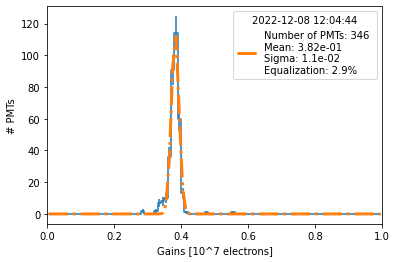

In [10]:
#file = "../calibrationdb/backgroundphotons_run9226_1670516550.csv" #nominal #getMostRecentCalibration()
#file = "../calibrationdb/backgroundphotons_run9227_1670518289.csv" #+50V
#file = "../calibrationdb/backgroundphotons_run9228_1670519753.csv" #+100V
#file = "../calibrationdb/backgroundphotons_run9229_1670521305.csv" #-30V
file = "../calibrationdb/backgroundphotons_run9230_1670522684.csv" #-50V

timestamp=getTimestamp(file)

print( "Loading data from: "+ file )

data = getDataFrame(file, offPMTs, False)

data[["pmt", "q", "eq"]].to_csv("histogram_run9230_1670522684.csv")

fitOutput  = fitGainsDistribution( data, BINSIZE=0.01,RMIN=0.0,RMAX=1.0, p0=(0.4, 0.04) )

plt.xlim((0.0, 1.0))
plt = makeplot(timestamp, "fit_test.pdf", *fitOutput )

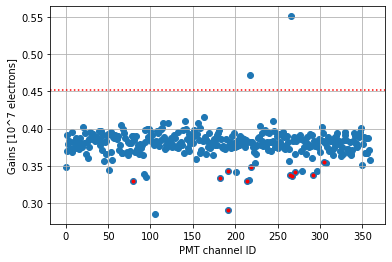

In [11]:
plt.scatter(data["pmt"],data["q"],marker="o")

drift_channels = PMTid_to_channel(driftPMTs)
drift_data = data[data['pmt'].isin(drift_channels)]
plt.scatter(drift_data["pmt"],drift_data["q"],marker=".",color="red")
plt.axhline(y=0.452, color="red", linestyle='dotted')

plt.xlabel("PMT channel ID")
plt.ylabel("Gains [10^7 electrons]")
plt.grid()

In [12]:
ch_high = data.loc[ data["q"] > 0.54, "pmt"]

print("PMT channels above 0.54")
pmt_high = channel_to_PMTid(ch_high)
print("Channel ID:")
print( ch_high.to_numpy() )
print("PMT ID:")
print( pmt_high )

PMT channels above 0.54
Channel ID:
[266]
PMT ID:
[94]


PMT channels below 0.4:
Channel ID:
[105 192]
PMT ID:
[259, 169]
[0.285259 0.289913]


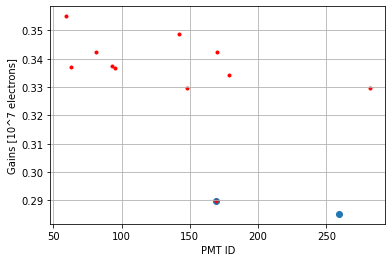

In [13]:
ch_low = data.loc[ data["q"] < 0.3, "pmt"]
print("PMT channels below 0.4:" )
pmt_low = channel_to_PMTid(ch_low)
print("Channel ID:")
print( ch_low.to_numpy() )
print("PMT ID:")
print( pmt_low )

q_low = data.loc [ data["q"] < 0.3, "q"]
plt.scatter(pmt_low,q_low,marker="o")
plt.scatter(channel_to_PMTid(drift_data["pmt"].to_numpy()),drift_data["q"].to_numpy(),marker=".",color="red")
plt.xlabel("PMT ID")
plt.ylabel("Gains [10^7 electrons]")
plt.grid()

print( q_low.to_numpy())